In [1]:
import tensorflow as tf
import matplotlib as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform 

print('Python version:', platform.python_version())
print('Tensorflow version:',tf.__version__)
print('Keras version:',tf.keras.__version__)

Python version: 3.12.7
Tensorflow version: 2.19.0
Keras version: 3.9.0


In [6]:
#pip install tensorflow

In [7]:
#Load the TensorBoard notebook extension
#%reLoad_ext tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [8]:
#Clear any Logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [10]:
print('x_train:', x_train.shape)

x_train: (60000, 28, 28)


In [11]:
print('y_train:', y_train.shape)

y_train: (60000,)


In [12]:
print('x_test:', x_test.shape)

x_test: (10000, 28, 28)


In [13]:
print('y_test:', y_test.shape)

y_test: (10000,)


In [14]:
#save image parameters to the constants that we will use later for data reshape
(_, IMAGE_WIDTH, IMAGE_HEIGHT)=x_train.shape
IMAGE_CHANNELS=1
print('IMAGE_WIDTH:',IMAGE_WIDTH);
print('IMAGE_HEIGHT:',IMAGE_HEIGHT);
print('IMAGE_CHANNELS:',IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [15]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [16]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'imshow'

In [18]:
import matplotlib.pyplot as plt

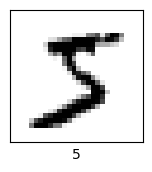

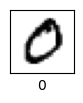

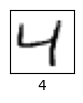

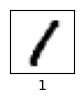

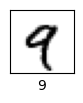

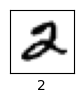

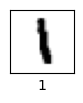

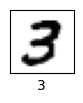

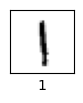

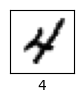

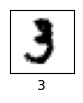

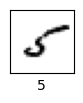

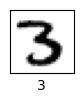

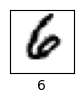

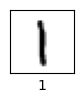

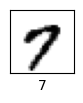

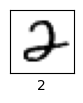

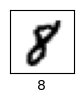

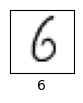

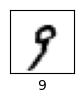

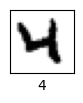

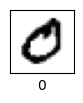

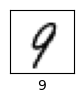

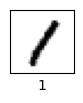

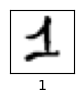

In [19]:
numbers_to_display =25
num_cells= math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
 plt.subplot(num_cells, num_cells, i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(x_train[i], cmap=plt.cm.binary)
 plt.xlabel(y_train[i])
 plt.show()

In [20]:
x_train_with_chanels=x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels=x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)  

In [21]:
print('x_train_with_chanels:',x_train_with_chanels.shape)
print('x_test_with_chanels:',x_test_with_chanels.shape)



x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [22]:
x_train_normalized=x_train_with_chanels/255
x_test_normalized=x_test_with_chanels/255


In [23]:
#lets check just  one row from 0th image to see color channel value after 
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [24]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
    

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 16)          │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,642 (818.91 KB)

 Trainable params: 209,642 (818.91 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [28]:
adam_optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [35]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training_history=model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized,y_test),
    callbacks=[tensorboard_callback]
)
                                                    

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9082 - loss: 0.2974 - val_accuracy: 0.9843 - val_loss: 0.0440
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0549 - val_accuracy: 0.9878 - val_loss: 0.0343
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9887 - loss: 0.0375 - val_accuracy: 0.9885 - val_loss: 0.0338
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9913 - val_loss: 0.0267
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9930 - loss: 0.0203 - val_accuracy: 0.9882 - val_loss: 0.0367
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9934 - loss: 0.0187 - val_accuracy: 0.9911 - val_loss: 0.0297
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9885 - val_loss: 0.0365
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9956 - loss: 0.0140 - 

In [33]:
import datetime

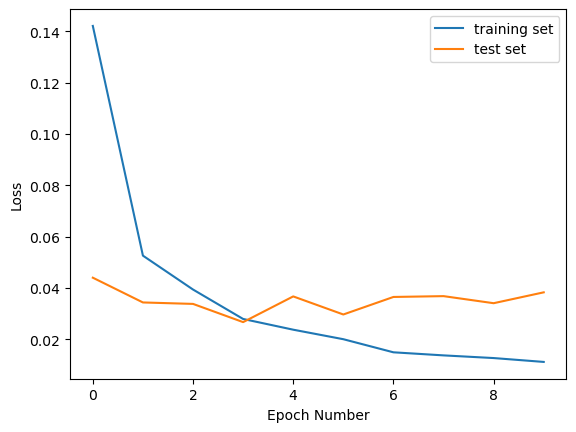

In [36]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

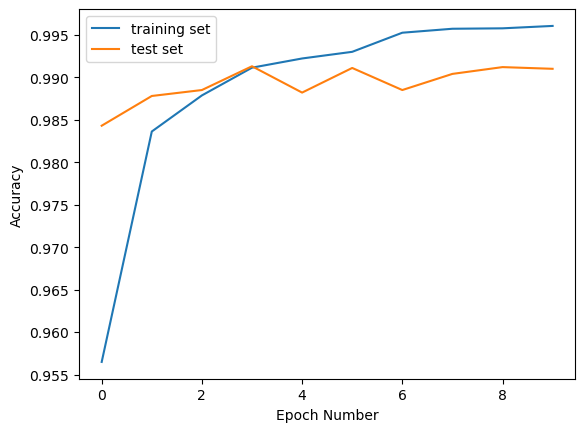

In [38]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [45]:
%%capture
validation_loss, validation_accuracy=model.evaluate(x_train_normalized, y_train)

In [46]:
print('Validation loss:', validation_loss)
print('Validation accuracy:', validation_accuracy)

Validation loss: 0.0038721126038581133
Validation accuracy: 0.9987499713897705


In [47]:
%%capture
train_loss, train_accuracy=model.evaluate(x_train_normalized, y_train)

In [49]:
print('Training loss:', train_loss)
print('Training accuracy:', train_accuracy)

Training loss: 0.0038721126038581133
Training accuracy: 0.9987499713897705


In [50]:
model_name='digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [51]:
loaded_model=tf.keras.models.load_model(model_name)

In [52]:
predictions_one_hot=loaded_model.predict([x_test_normalized])

136/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [55]:
print('predictions_one_hot:',predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [56]:
#Predictions in form of one-hot vectors (array of probabolities)
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.865396e-16,5.625047e-13,1.925231e-12,2.682347e-12,3.573408e-11,3.280799e-16,1.017183e-21,1.000000e+00,4.633430e-17,9.749810e-09
1,6.191427e-16,1.003611e-17,1.000000e+00,8.281268e-20,2.657578e-19,2.068517e-26,4.400430e-20,4.404274e-21,3.205608e-15,4.394752e-24
2,7.061169e-16,9.999983e-01,3.255011e-10,5.998684e-16,5.857426e-07,6.830925e-10,2.407571e-12,3.352767e-07,6.805057e-07,1.350943e-10
3,9.999998e-01,6.748768e-13,3.610343e-13,7.596175e-15,1.705728e-09,1.050358e-12,4.509366e-08,4.006471e-11,6.834502e-11,2.038734e-07
4,5.474591e-18,6.756899e-16,4.841082e-20,3.352178e-22,1.000000e+00,1.132258e-16,1.447870e-17,1.165030e-18,5.064299e-14,3.563454e-09
...,...,...,...,...,...,...,...,...,...,...
9995,8.571860e-12,1.134882e-10,1.000000e+00,1.385078e-10,1.756305e-17,2.401475e-23,3.599334e-18,9.541409e-09,8.270311e-09,4.819549e-17
9996,6.875467e-15,3.612381e-14,6.625024e-15,1.000000e+00,4.445371e-15,4.004001e-09,5.699366e-18,4.340633e-10,3.912462e-14,2.971585e-09
9997,1.698613e-22,1.195333e-15,1.874485e-23,4.061132e-24,1.000000e+00,4.986764e-18,1.466038e-17,6.006335e-18,2.099085e-14,1.116786e-15
9998,1.693921e-16,2.844235e-18,2.027499e-21,4.636696e-12,1.015904e-21,1.000000e+00,5.310917e-17,1.524601e-17,2.572937e-10,5.109243e-13


In [57]:
predictions=np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


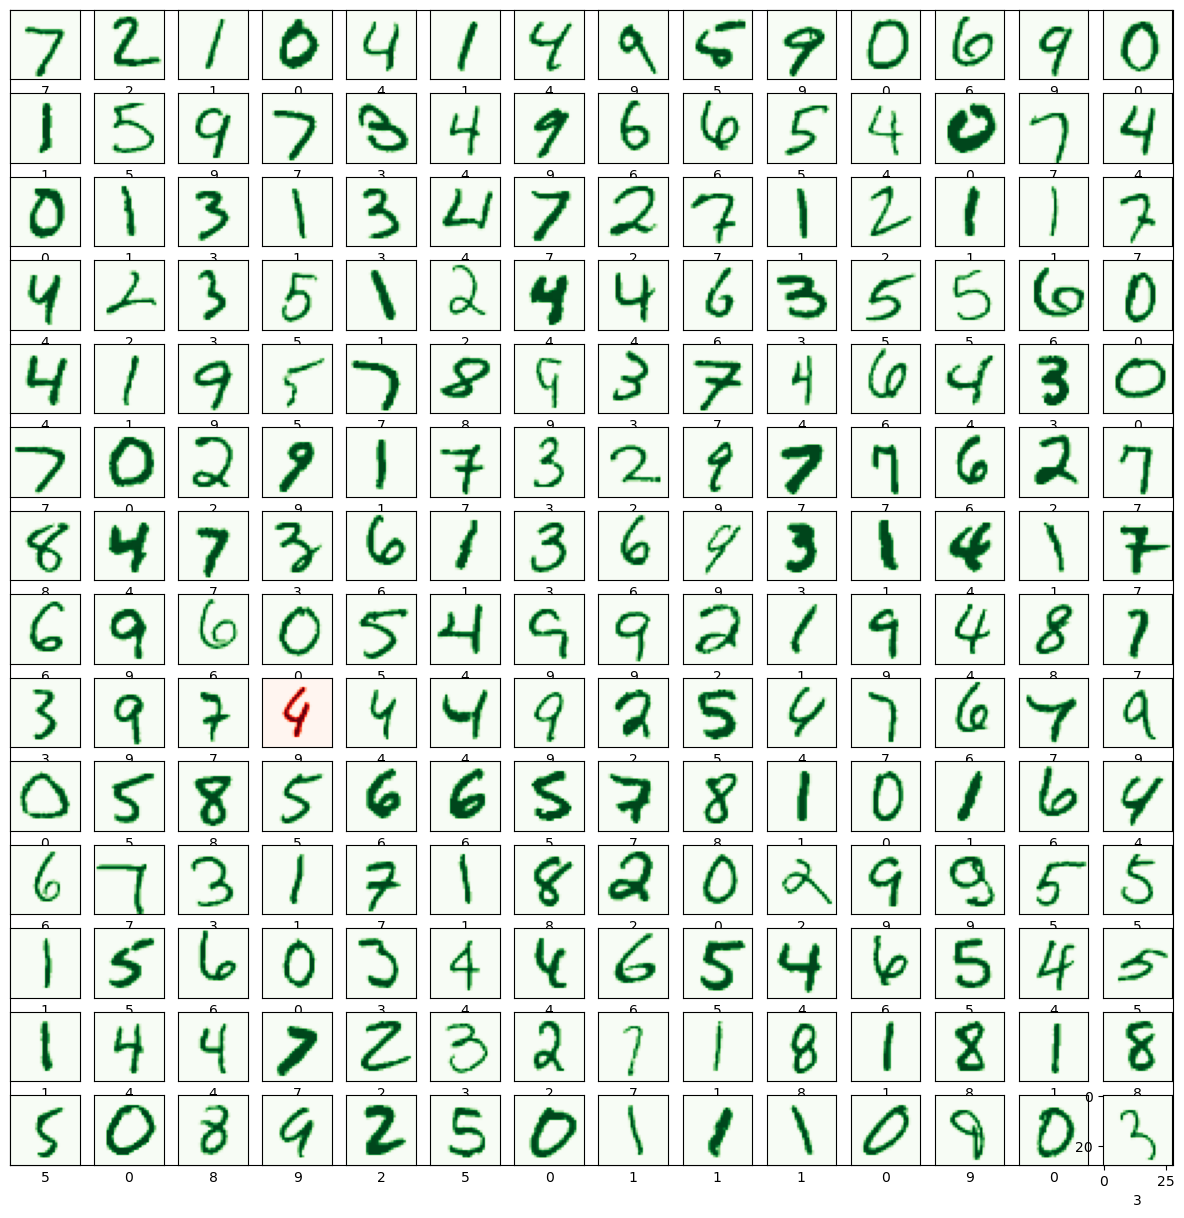

In [58]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map='Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.show()
            